
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [4]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Scatter plot for Training dataset: 


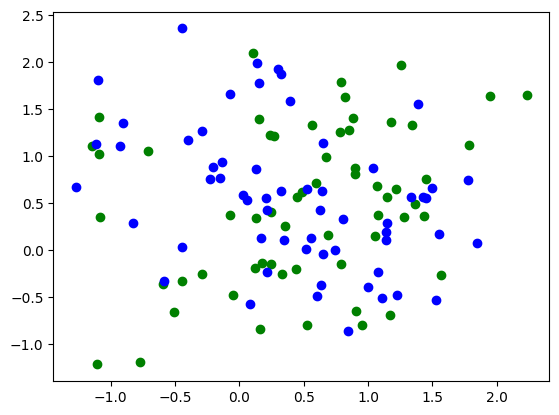

Scatter plot for Test dataset: 


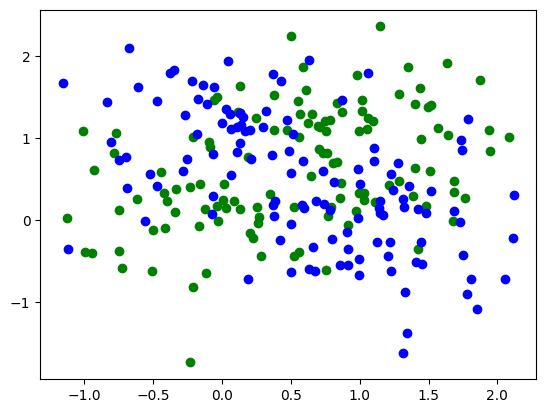

In [5]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= np.array([0,0])
mean2= np.array([0,1])
mean3= np.array([1,0])
mean4= np.array([1,1])
cov= np.array([[0.3,0],[0,0.3]])

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample1 = np.random.multivariate_normal(mean1,cov,90)
sample2 = np.random.multivariate_normal(mean2,cov,90)
sample3 = np.random.multivariate_normal(mean3,cov,90)
sample4 = np.random.multivariate_normal(mean4,cov,90)



#Generate training data
train1 = sample1[:30]
train2 = sample2[:30]
train3 = sample3[:30]
train4 = sample4[:30]
# Number of training instances = 120 = value of n


#Generate testing data
test1 = sample1[30:]
test2 = sample2[30:]
test3 = sample3[30:]
test4 = sample4[30:]

#Visualize the data using plt.scatter() function
# concatenating both the training datasets to form 1 class
class1_train = np.concatenate((train1,train4),axis = 0)
class2_train = np.concatenate((train2,train3),axis = 0)
class1_test = np.concatenate((test1,test4),axis = 0)
class2_test = np.concatenate((test2,test3),axis = 0)

# assigning labels
label1 = [1 for i in range(120)]
label2 = [-1 for i in range(120)]

# function to plot scatter plot for training and test dataset
def scatter_plot(array,color):
    x = []
    y = []
    for pair in array:
        x.append(pair[0])
        y.append(pair[1])
    plt.scatter(x,y,c=color)

print("Scatter plot for Training dataset: ")
scatter_plot(class1_train,"green")
scatter_plot(class2_train,"blue")
plt.show()
print("Scatter plot for Test dataset: ")
scatter_plot(class1_test,"green")
scatter_plot(class2_test,"blue")
plt.show()

# mapping training datasets with their corresponding labels
zipped_training_data1 = zip(class1_train, label1)
training_data1 = list(zipped_training_data1)
zipped_training_data2 = zip(class2_train, label2)
training_data2 = list(zipped_training_data2)
training_data = training_data1 + training_data2




Accuracy for k = 15 : 68.33%


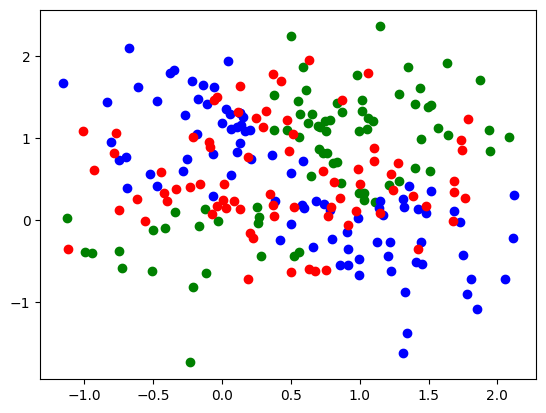

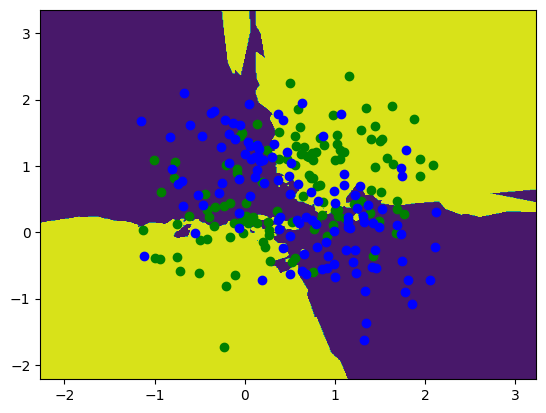

In [8]:
########################################
#Part(b) #KNN classification
########################################

# function definitions for various distances

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point2 - point1) ** 2))

def manhattan_distance(point1, point2):
    return np.sum(np.abs(point2 - point1))

def chebyshev_distance(point1, point2):
    return np.max(np.abs(point2 - point1))

def firstElement(array):
  return array[0]

# Write "KNNClassify" function
def KNNClassify(X_train, Y_train, X_test, k, distance_measure):
    '''
    #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
    #Outputs : Predicted class
    '''
     # Algorithm
    # 1.Initialize a list to store the predictions of our algorithm
    # 2.Iterate through the test points
    # 3.    Initialize a list to store the distances of test point with each of the training point.
    # 4.    Iterate through the training points
    # 5.        Compute the distance between the test and train point
    # 6.    Find out the k nearest neighbours
    # 7.    Get the most frequent label of k nearest neighbours
    # 8.Return the predictions
    # Fill the code
    predictions = []
    distance_func = None
    if distance_measure == 'euclidean':
        distance_func = euclidean_distance
    elif distance_measure == 'manhattan':
        distance_func = manhattan_distance
    elif distance_measure == 'chebyshev':
        distance_func = chebyshev_distance
    for test_point in X_test:
        distances1 = []
        for train_point in [data[0] for data in X_train]:
            distances1.append(distance_func(train_point, test_point))
        zipped1 = zip(distances1,[data[1] for data in X_train])
        distances1 = list(zipped1)
        distances2 = []
        for train_point in [data[0] for data in Y_train]:
            distances2.append(distance_func(train_point, test_point))
        zipped2 = zip(distances2,[data[1] for data in Y_train])
        distances2 = list(zipped2)
        distances1.sort(key = firstElement)
        distances2.sort(key = firstElement)
        k_nearest_distances1 = distances1[:k]
        k_nearest_distances2 = distances2[:k]
        count = 0
        k_nearest_distances = k_nearest_distances1 + k_nearest_distances2
        k_nearest_distances.sort(key = firstElement)
        k_nearest_distances = k_nearest_distances[:k]
        k_nearest_labels = [label[1] for label in k_nearest_distances]
        label1 = k_nearest_labels.count(1)
        if label1 > k/2:
          label = 1
        else:
          label = -1
        predictions.append(label)
    return predictions


k = 15

predictions1 = KNNClassify(training_data1,training_data2,class1_test,k,'euclidean')
predictions2 = KNNClassify(training_data1,training_data2,class2_test,k,'euclidean')



#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    '''
    #Inputs : Ground truth and predicted labels
    #Outputs : Portion of data points that are correctly classified, i.e., accuracy
    '''
    #Algorithm
    #1. Iterate through the total number of predictions
    #2.     Verify wheter the ground truth matches with the predictions
    #3. Compute and return the percentage of the correctly classified points
    #Fill the code
    count = 0
    for i in range(len(pred)):
        if int(pred[i])==int(true[i]):
            count+=1
    return ((count/len(pred)*100))



predictions = predictions1 + predictions2
labels = label1 + label2
accuracy = KNNAccuracy(labels,predictions)
print(f"Accuracy for k = {k} : {accuracy:.2f}%")


#Create a visual representation of predictions
# plotting correct and incorrect points using scatter plot
correct1 = []
correct2 = []
incorrect = []
for index in range(len(predictions1)):
    if predictions1[index]==1:
        correct1.append(class1_test[index])
    else:
        incorrect.append(class1_test[index])
for index in range(len(predictions2)):
    if predictions2[index]==-1:
        correct2.append(class2_test[index])
    else:
        incorrect.append(class2_test[index])

scatter_plot(correct1,"green")
scatter_plot(correct2,"blue")
scatter_plot(incorrect,"red")
plt.show()





#Generate and visualize the decision regions and overlay the test points

a = np.arange(start=min([data[0][0] for data in training_data]) - 1,
              stop=max([data[0][0] for data in training_data])+1, step=0.01)
b = np.arange(start=min([data[0][1] for data in training_data]) - 1,
              stop=max([data[0][1] for data in training_data])+1, step=0.01)
XX, YY = np.meshgrid(a, b)
input_array = np.array([XX.ravel(), YY.ravel()]).T
Predictions = np.array(KNNClassify(
    training_data1, training_data2, input_array, 23,'euclidean'))
plt.contourf(XX, YY, Predictions.reshape(XX.shape))
scatter_plot(class1_test,"green")
scatter_plot(class2_test,"blue")
plt.show()

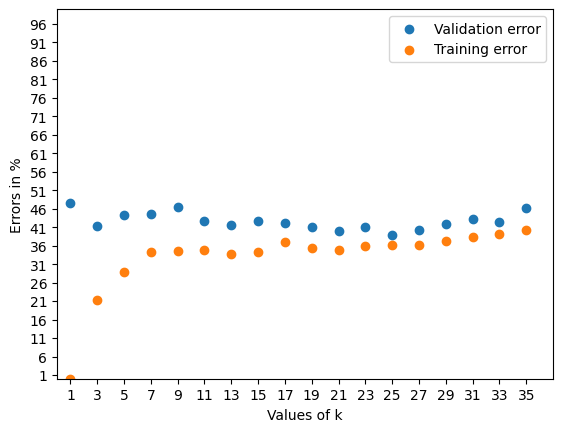

Value of k for optimum accuracy is : 25


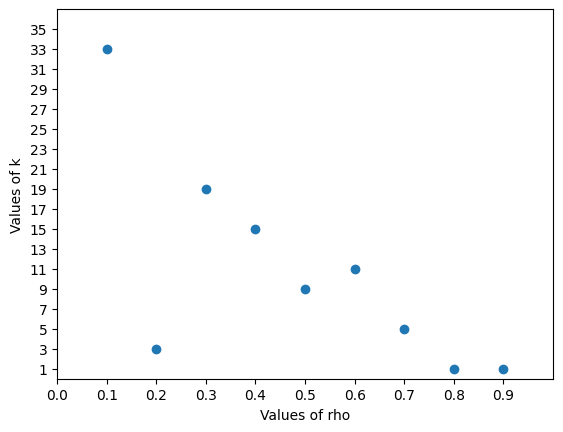

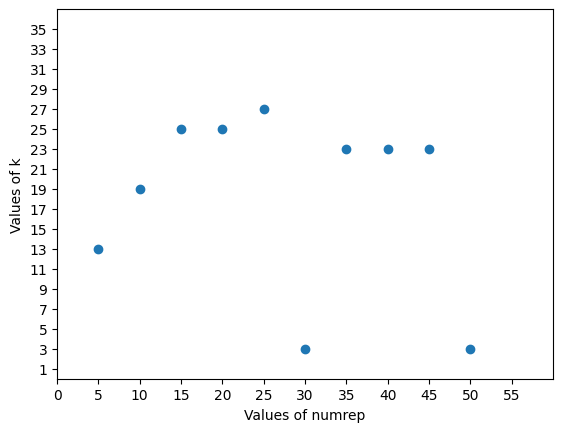

Accuracy for optimum k = 25 : 68.33%
Change in accuracy = 0.00%


In [7]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho,training_data,numof_trainingpoints):
    #Iterate through range of k values
      #Iterate through number of repetations
        #Hold out rho fraction of training data in each repetition.
    index = int(rho*numof_trainingpoints)
    errors = []
    for _ in range(numrep):
        random.shuffle(training_data)
        validation_set = training_data[:index]
        new_training_data = training_data[index:]
        for k in range(k_range[0],k_range[1]+1,k_range[2]):
            new_training_data_class1 = [data for data in new_training_data if data[1]==1]
            new_training_data_class2 = [data for data in new_training_data if data[1]==-1]
            validation_inputs = [data[0] for data in validation_set]
            validation_accuracy = KNNAccuracy([data[1] for data in validation_set],KNNClassify(new_training_data_class1,new_training_data_class2,validation_inputs,k,'euclidean'))
            training_accuracy = KNNAccuracy([data[1] for data in new_training_data],KNNClassify(new_training_data_class1,new_training_data_class2,[data[0] for data in new_training_data],k,'euclidean'))
            errors.append([100-validation_accuracy,100-training_accuracy])
    # total:  (numrep * no. of values of k possible) entries in errors
    num_of_k_values = int(((k_range[1]-k_range[0])/k_range[2]) + 1)
    final_errors = []
    for i in range(num_of_k_values):
        error1 =  0
        error2 = 0
        for j in range(numrep):
            error1 += errors[i + num_of_k_values*j][0]
            error2 += errors[i + num_of_k_values*j][1]
        avg_error1 = error1/numrep
        avg_error2 = error2/numrep
        final_errors.append([avg_error1,avg_error2])
    return final_errors


min_k = 1
max_k = 35
numrep = 10
rho = 0.3
errors = holdoutCVkNN((min_k,max_k,2),numrep,rho,training_data,120)

k_values = [k for k in range(min_k,max_k+1,2)]



#Plot training and validation errors for different values of k
fig,ax = plt.subplots()
ax.scatter(k_values,[error[0] for error in errors ],label = "Validation error")
ax.scatter(k_values,[error[1] for error in errors ],label="Training error")
ax.set(xlim = (0,37),xticks = np.arange(1,37,2),ylim = (0,100),yticks = np.arange(1,100,5),xlabel = "Values of k",ylabel = "Errors in %" )
ax.legend()
plt.show()




# function definition to calculate the optimum k
def takeSecond(element):
    return element[0]
def optimum_k_calculator(final_errors,k_values):
    zipped_validationError_with_k = zip([data[0] for data in final_errors],k_values)
    validation_error_with_k = list(zipped_validationError_with_k)
    validation_error_with_k.sort(key = takeSecond)
    return validation_error_with_k[0][1]
optimum_k = optimum_k_calculator(errors,k_values)
print(f"Value of k for optimum accuracy is : {optimum_k}")

#Effect of rho and number repetations on k
# EFFECT OF RHO
value_of_rho = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
value_of_k = []
for rho in value_of_rho:
    Errors = holdoutCVkNN((min_k,max_k,2),numrep,rho,training_data,120)
    k = optimum_k_calculator(Errors,k_values)
    value_of_k.append(k)
fig,ax = plt.subplots()
ax.scatter(value_of_rho,value_of_k)
ax.set(xlim = (0,1),xticks = np.arange(0,1,0.1),ylim = (0,37),yticks = np.arange(1,37,2),xlabel = "Values of rho",ylabel = "Values of k" )
plt.show()

# EFFECT OF numofrep
rho = 0.3
value_of_numrep = [5,10,15,20,25,30,35,40,45,50]
value_of_k = []
for rep in value_of_numrep:
    AnotherErrors = holdoutCVkNN((min_k,max_k,2),rep,rho,training_data,120)
    k = optimum_k_calculator(AnotherErrors,k_values)
    value_of_k.append(k)
fig,ax = plt.subplots()
ax.scatter(value_of_numrep,value_of_k)
ax.set(xlim = (0,60),xticks = np.arange(0,60,5),ylim = (0,37),yticks = np.arange(1,37,2),xlabel = "Values of numrep",ylabel = "Values of k" )
plt.show()

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
best_predictions1 = KNNClassify(training_data1,training_data2,class1_test,optimum_k,'euclidean')
best_predictions2 = KNNClassify(training_data1,training_data2,class2_test,optimum_k,'euclidean')
best_predictions = best_predictions1 + best_predictions2
new_accuracy = KNNAccuracy(labels,best_predictions)
print(f"Accuracy for optimum k = {optimum_k} : {new_accuracy:.2f}%")
print(f"Change in accuracy = {((new_accuracy-accuracy)/accuracy)*100:.2f}%")




## __what is the best value for k?__ ##
### Locate the Optimal k:
### Underfitting Zone: If both training and validation errors are high, it indicates the model is too simple (high bias). Increase the complexity (reduce k).
### Optimal Zone: Look for the point where the validation error is the lowest. This point generally signifies the optimal balance between bias and variance.
### Overfitting Zone: If the validation error starts to increase while the training error keeps decreasing, it suggests the model is overfitting (high variance). Choose a simpler model (increase k).
### Select Optimal k:
### Choose the k value corresponding to the lowest validation error. This value should provide the best trade-off between bias and variance, ensuring good generalization without overfitting

## __Effect of rho on value of k__ ##
### The trend we observe is that as the value of rho increases (size of training set decreases) value of optimum k decreases as well

## __Effect of numrep on value of k__ ##
### We do not observe any significant trend on changing the value of numrep as sometimes k fluctuates on changing numrep and is neither monotonically increasing or decreasing and sometimes the value remains more or less same so value of k does not heavily depend on numrep performed. But when increasing the value of numrep the solution becomes more stable and value of k fluctuates less as we are performing experiment many times so other invaluable factors are nullified.


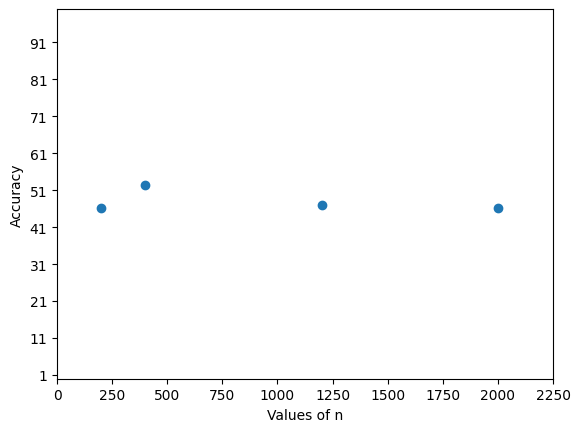

accuracy with higher variance and 12.5% of error introduced by flipping some labels : 53.75


In [9]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
N = [200,400,1200,2000]
new_accuracy = []
for n in N:
    train1 = np.random.multivariate_normal(mean1,cov,int(n/4))
    train2 = np.random.multivariate_normal(mean2,cov,int(n/4))
    train3 = np.random.multivariate_normal(mean3,cov,int(n/4))
    train4 = np.random.multivariate_normal(mean4,cov,int(n/4))

    min_k = round(round(math.sqrt(n)) - n/100 )
    max_k =  round(round(math.sqrt(n)) + n/20)
    step = round(n/100)

    new_class1_train = np.concatenate((train1,train4),axis = 0)
    new_class2_train = np.concatenate((train2,train3),axis = 0)

    new_label1 = [1 for i in range(n)]
    new_label2 = [-1 for i in range(n)]
    new_labels = new_label1+new_label2

    zipped_training_data1 = zip(new_class1_train,new_label1)
    new_training_data1 = list(zipped_training_data1)
    zipped_training_data2 = zip(new_class2_train,new_label2)
    new_training_data2 = list(zipped_training_data2)

    new_training_data = new_training_data1+new_training_data2

    new_errors = holdoutCVkNN((min_k,max_k,step),numrep,rho,new_training_data,n)
    new_optimum_k = optimum_k_calculator(new_errors,k_values)

    best_predictions1 = KNNClassify(new_training_data1,new_training_data2,class1_test,new_optimum_k,'euclidean')
    best_predictions2 = KNNClassify(new_training_data1,new_training_data2,class2_test,new_optimum_k,'euclidean')

    best_predictions = best_predictions1 + best_predictions2
    accuracy = KNNAccuracy(new_labels,best_predictions)
    new_accuracy.append(accuracy)

fig,ax = plt.subplots()
ax.scatter(N,new_accuracy)
ax.set(xlim = (0,2200),xticks = np.arange(0,2500,250),ylim = (0,100),yticks = np.arange(1,100,10),xlabel = "Values of n",ylabel = "Accuracy" )
plt.show()


#Experiments with more difficult data set.
new_cov= np.array([[0.7,0],[0,0.7]])
new_sample1 = np.random.multivariate_normal(mean1,new_cov,90)
new_sample2 = np.random.multivariate_normal(mean2,new_cov,90)
new_sample3 = np.random.multivariate_normal(mean3,new_cov,90)
new_sample4 = np.random.multivariate_normal(mean4,new_cov,90)



#Generate training data
train1 = new_sample1[:30]
train2 = new_sample2[:30]
train3 = new_sample3[:30]
train4 = new_sample4[:30]
# Number of training instances = 120


#Generate testing data
test1 = new_sample1[30:]
test2 = new_sample2[30:]
test3 = new_sample3[30:]
test4 = new_sample4[30:]

#Visualize the data using plt.scatter() function
new_class1_train = np.concatenate((train1,train4),axis = 0)
new_class2_train = np.concatenate((train2,train3),axis = 0)
new_class1_test = np.concatenate((test1,test4),axis = 0)
new_class2_test = np.concatenate((test2,test3),axis = 0)

training_label1 = [1 for i in range(60)]
training_label2 = [-1 for i in range(60)]

# adding some noise flipping some labels     15 labels flipped for 120 training points (12.5% error introduced)
training_label1[:8] = [-1 for i in range(8)]
training_label2[:7] = [+1 for i in range(7)]

new_training_data1 = list(zip(new_class1_train, training_label1))
new_training_data2 = list(zip(new_class2_train, training_label2))

test_label1 = [1 for i in range(120)]
test_label2 = [-1 for i in range(120)]
test_labels = test_label1 + test_label2
new_training_data = new_training_data1 + new_training_data2

min_k = 1
max_k = 27
step = 2
numrep = 10
rho = 0.3
k_values = [k for k in range(min_k,max_k+1,2)]

new_errors = holdoutCVkNN((min_k,max_k,step),numrep,rho,new_training_data,120)
new_optimum_k = optimum_k_calculator(new_errors,k_values)

best_predictions1 = KNNClassify(new_training_data1,new_training_data2,new_class1_test,new_optimum_k,'euclidean')
best_predictions2 = KNNClassify(new_training_data1,new_training_data2,new_class2_test,new_optimum_k,'euclidean')
best_predictions = best_predictions1 + best_predictions2
accuracy = KNNAccuracy(test_labels,best_predictions)
print(f"accuracy with higher variance and 12.5% of error introduced by flipping some labels : {accuracy:.2f}")




## __Good range for k as n changes__  ##

 On performing experiment we can say that square root of n is a good approximation of k as it is generally the value corresponding to minimum validation error. So range of k is chosen from sqrt(n) - f(n)  to  sqrt(n) + g(n)   where f(n) and g(n) are functions of n with step of some function of n so that we can cover its nearby values too.

Decision region for euclidean distance


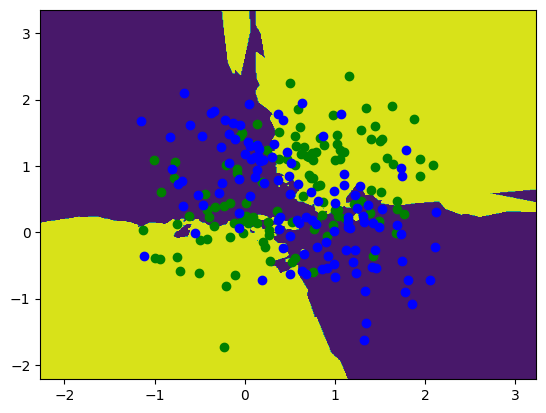

Decision region for manhattan distance


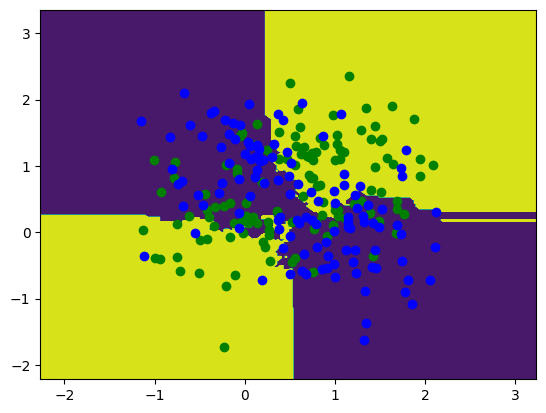

Decision region for chebyshev distance


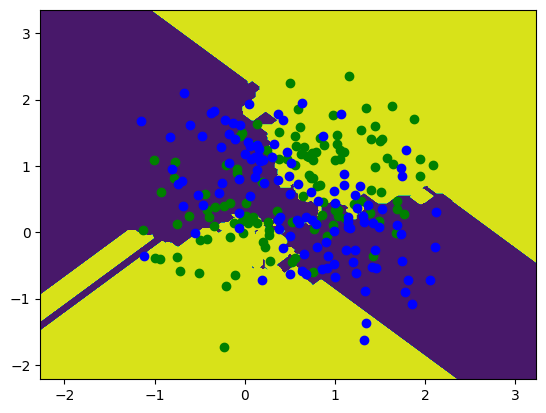

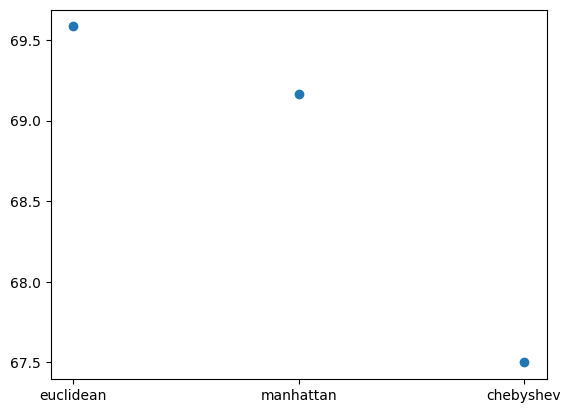

In [11]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
# functions all defined before
Accuracy = []
k=23
for dist in ["euclidean","manhattan","chebyshev"]:
    predictions1 = KNNClassify(training_data1,training_data2,class1_test,k,dist)
    predictions2 = KNNClassify(training_data1,training_data2,class2_test,k, dist)
    predictions = predictions1 + predictions2

    accuracy = KNNAccuracy(labels,predictions)
    Accuracy.append(accuracy)

    #Understand the decision regions of KNN classifier with different distance measures
    print(f"Decision region for {dist} distance")
    a = np.arange(start=min([data[0][0] for data in training_data]) - 1,
              stop=max([data[0][0] for data in training_data])+1, step=0.01)
    b = np.arange(start=min([data[0][1] for data in training_data]) - 1,
                stop=max([data[0][1] for data in training_data])+1, step=0.01)

    XX, YY = np.meshgrid(a, b)
    input_array = np.array([XX.ravel(), YY.ravel()]).T
    Predictions = np.array(KNNClassify(
        training_data1, training_data2, input_array, 23,dist))

    plt.contourf(XX, YY, Predictions.reshape(XX.shape))
    scatter_plot(class1_test,"green")
    scatter_plot(class2_test,"blue")
    plt.show()

fig,ax = plt.subplots()
ax.scatter(["euclidean","manhattan","chebyshev"],Accuracy)
plt.show()




__Effect of distance metrics on decision regions__
### Euclidean Distance ###
 - Decision regions formed by using euclidean distances tend to have spherical shapes.
 - Sensitive to the overall distance between points.
### Manhattan Distance ###
 - Decision regions formed by using Manhattan distances tend to have boundaries along axes, resulting in hyper-rectangular shapes.
 - Effective when features have different scales.
### Chebyshev Distance ###
 - Decision regions formed by using Chebyshev distances tend to have boundaries forming square shaped or hyper-rectangles.
 - Sensitive to outliers, influencing the shape of decision regions.

In [13]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()      # a numpy array of 70,000 elements with each element being a 1D array of 784 entries specifying value of each pixel
new_images = images[:5000]
targets = mnist.target.to_numpy()
new_targets = targets[:5000]          # returns a string of classified number
#Plot a few images
# plt.subplot(211)
# plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
# plt.subplot(212)
# plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
total_data = np.column_stack((new_images, new_targets))


index1 = int(0.8 * len(new_images))
index2 = int(0.9 * len(new_images))

training_data = total_data[:index1]
validation_data = total_data[index1:index2]
test_data = total_data[index2:]

# Extract images and targets separately
training_images = training_data[:, :-1]
training_targets = training_data[:, -1]

validation_images = validation_data[:, :-1]
validation_targets = validation_data[:, -1]

test_images = test_data[:, :-1]
test_targets = test_data[:, -1]

def takeFirst(array):
  return array[0]

#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(Training, Test, k,distance_measure):
    distance_func = None
    if distance_measure == 'euclidean':
        distance_func = euclidean_distance
    elif distance_measure == 'manhattan':
        distance_func = manhattan_distance
    elif distance_measure == 'chebyshev':
        distance_func = chebyshev_distance

    majority = []
    for image in Test:
        distances = []

        for trainPoint in Training:
            distance = distance_func(image ,trainPoint[:-1])  # Exclude the target when calculating distance
            distances.append(distance)

        nums = Training[:, -1]  # Targets are in the last column
        final_distances = list(zip(distances, nums))
        final_distances.sort(key=takeFirst)

        k_nearest = final_distances[:k]
        k_nearest = [ int(val[1]) for val in k_nearest ]
        majority.append(np.bincount(k_nearest).argmax())

    return majority


#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
k_values = [1,3,15,49,99,149]
MulticlassAccuracy = []
for k in k_values:
    predictions = MultiClassKNNClassify(training_data,validation_images,k,'euclidean')
    accuracy = KNNAccuracy(validation_targets,predictions)
    MulticlassAccuracy.append(accuracy)

fig,ax = plt.subplots()
ax.scatter(k_values,MulticlassAccuracy)
ax.set(xlim = (0,200),xticks = [1,3,15,49,99,149],ylim = (0,100),yticks = np.arange(1,110,10),xlabel = "Values of k",ylabel = "Accuracy" )
plt.show()

for index,k in enumerate(k_values):
    if index == MulticlassAccuracy.index(max(MulticlassAccuracy)):
        K_optimum = k
print(f"Optimum k for this MultiClass KNN classifier = {K_optimum}")
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

Accuracy = []
distance_metrics = ["euclidean","manhattan","chebyshev"]
for dist in distance_metrics:
    predictions = MultiClassKNNClassify(training_data,validation_data[:,:-1],200,dist)
    Accuracy.append(KNNAccuracy(validation_targets,predictions))


index = Accuracy.index(max(Accuracy))
if index == 0:
    best_distance_measure = "euclidean"
elif index == 1:
    best_distance_measure = "manhattan"
else:
    best_distance_measure = "chebyshev"

fig,ax = plt.subplots()
ax.scatter(["euclidean","manhattan","chebyshev"],Accuracy)
plt.show()



# Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
Predictions = MultiClassKNNClassify(training_data,test_images,K_optimum,best_distance_measure)
Best_Accuracy = KNNAccuracy(test_targets,Predictions)
print(f"Best Accuracy is for k = {K_optimum} and its value is {Best_Accuracy}")


#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    confusion_matrix = np.zeros((10,10))
    for i in range(len(true)):
        alpha = int(true[i])
        beta = int(pred[i])
        confusion_matrix[alpha][beta]+=1
    return confusion_matrix

print(f"confusion matrix for test dataset(with optimal k and distance measure) is : \n{compute_confusion_matrix(test_targets,Predictions)}")
# as the time to run the program is very high so I attached the output of (f) part in a separate pdf attached in classroom for training size of 5000

#Suggest an alternative ways to improve performance





/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

## Alternate ways to improve performance :
### One of the ways to improve performance is by using average of all values of an entire row so instead of doing 784 mathematical calculation per image per comparison it is reduced to 28 per image per comparison so it will greatly improve performance.
### Another way to improve performance is by scaling the pixel values to 0 and 1. This can improve convergence and overall performance.

# Observations on the confusion matrix:
## Diagonal Elements (True Positives):

- The diagonal elements (from the top-left to the bottom-right) represent the number of correctly predicted instances for each class. In the context of MNIST, this would be the number of correctly classified digits for each digit class.

## Off-Diagonal Elements (False Positives and False Negatives):

- Off-diagonal elements represent misclassifications. For example, the element in row i and column j represents the number of instances of class i that were predicted as class j.
- Off-diagonal elements above the main diagonal are false positives (instances predicted as class j but actually belong to class i).
- Off-diagonal elements below the main diagonal are false negatives (instances predicted as class i but actually belong to class j).

## Row Sums (Actual Class Counts):

- The sum of each row represents the total number of instances for each actual class.

## Column Sums (Predicted Class Counts):

- The sum of each column represents the total number of instances predicted for each class.

## Accuracy:

- The overall accuracy can be calculated as the sum of the diagonal elements divided by the total number of instances.

## Precision and Recall:

- Precision and recall can be calculated for each class using the elements of the confusion matrix. Precision is the ratio of true positives to the sum of true positives and false positives. Recall is the ratio of true positives to the sum of true positives and false negatives.

### As the max accuracy is >90% so most of the off diagonal values of confusion matrix are 0 and diagonal entries are all non-zero and are quite significant

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.